In [1]:
import numpy as np
import sys
sys.path.insert(-1, "/home/jhongda/Research/Synapes/script")



In [7]:
import AgExtract.interface as intf
import AgExtract.utilities as utl
import AgExtract.data as data

In [60]:
prm = utl.load_prm("output/a_hillN5/base/param.json")
prm["eb"] = 20
prm["ed"] = 10
config=  utl.load_prm("output/b_hillT5/base/config.json")
config["save"] = False
config["dir"] = "."
config["write_log"] = False
config["cluster_num"] = 50
config["num_run"] = 20

In [72]:
def scanL0(prm, l0list, f0=6, Fm=False, mc=0.5):
    
    df = data.MyData(qty_name=["prms", "ntot", "nstd_tot",
                               "nag_seg", "nstd_seg", 
                               "nag_seg2", "nstd_seg2", 
                               "scaled_diff", "scaled_diff_std"])
    
    
    for l0 in l0list:
        print(">>>> prms=", l0, "-"*8)
        df.append(["prms"], [l0])
        
        prm["l0"] = l0//2
        prm["l1"] = l0//2
        
        prm["f0"] = f0*l0
        if Fm:
            prm["mc"] = int(mc*l0)
        utl.sync_prm(prm)
        agent0 = intf.Agent(prm=prm, jobs=["spd"])
        agent0.load_config(config)
        agent0.run()
        ntot = agent0.dataset.get("ntot", True)
        nstd = agent0.dataset.get("nstd_tot", True)
        
        df.append(["ntot", "nstd_tot"], [agent0.dataset.get_mean("ntot"), agent0.dataset.get_mean("nstd_tot")])
        
        prm["l0"] = 0
        prm["l1"] = l0
        utl.sync_prm(prm)
        agent1 = intf.Agent(prm=prm, jobs=["spd"])
        agent1.load_config(config)
        agent1.run()
        
        nag1 = agent1.dataset.get("nag", True)
        df.append(["nag_seg", "nstd_seg"], [agent1.dataset.get_mean("nag"), agent1.dataset.get_mean("nstd")])
        
        prm["l0"] = l0
        prm["l1"] = 0
        utl.sync_prm(prm)
        agent2 = intf.Agent(prm=prm, jobs=["spd"])
        agent2.load_config(config)
        agent2.run()
        nag2 = agent2.dataset.get("nag_antag", True)
        
        df.append(["nag_seg2", "nstd_seg2"], [agent2.dataset.get_mean("nag_antag"), agent2.dataset.get_mean("nstd_antag")])
        
        scaled_diff = (nag1+nag2-ntot*2)/(np.sqrt(2)*nstd)
        df.append(["scaled_diff", "scaled_diff_std"], [np.mean(scaled_diff), np.std(scaled_diff)])
        
        print(">>>> scaled_diff=", np.mean((nag1+nag2-ntot*2)/(np.sqrt(2)*nstd)), "-"*8)
    return df

#mydata = scanL0(prm, np.arange(50, 350, 50))
#mydata2 = scanL0(prm, np.arange(50, 350, 50), Fm=True, mc=0.5)

#mydata2.dump("output/h_varyL0/hillN5")

'output/h_varyL0/hillN5'

## 1. small L0

In [26]:
import matplotlib.pyplot as plt

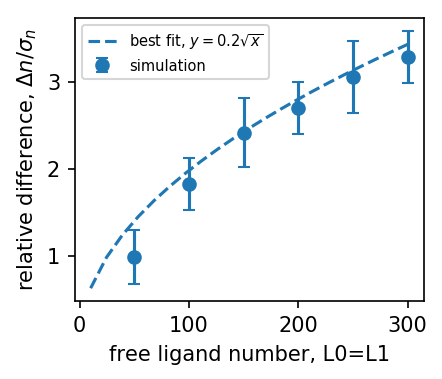

In [59]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=150)
plt.errorbar(mydata.get("prms"), mydata.get("scaled_diff"), yerr=mydata.get("scaled_diff_std"), fmt='o', capsize=3)

plt.plot(np.linspace(10, 300, 21), np.sqrt(0.03917)*np.sqrt(np.linspace(10, 300, 21)), '--C0')
ax.set(xlabel="free ligand number, L0=L1", ylabel=r"relative difference, $\Delta n/\sigma_n$")
plt.legend(["best fit, $y=0.2\sqrt{x}$", "simulation"], fontsize=7)
plt.show()

0.197914122790669

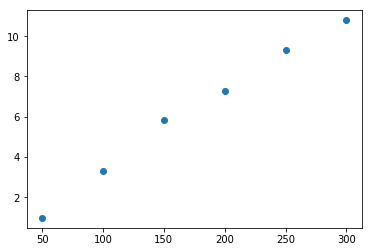

In [69]:
plt.plot(mydata.get("prms"), mydata.get("scaled_diff", True)**2, 'o')

np.sqrt(0.03917)

In [64]:
np.polyfit(mydata2.get("prms"), mydata2.get("scaled_diff", True)**2, 1)

array([ 0.04438991, -1.34392643])

In [66]:
 np.sqrt(0.04439)

0.21068934477092097

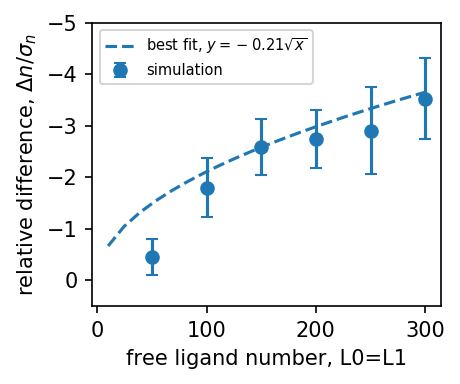

In [70]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=150)
plt.errorbar(mydata2.get("prms"), mydata2.get("scaled_diff"), yerr=mydata2.get("scaled_diff_std"), fmt='o', capsize=3)

plt.plot(np.linspace(10, 300, 21), -0.211*np.sqrt(np.linspace(10, 300, 21)), '--C0')
ax.set(xlabel="free ligand number, L0=L1", ylabel=r"relative difference, $\Delta n/\sigma_n$")
plt.ylim(0.5, -5)
plt.legend(["best fit, $y=-0.21\sqrt{x}$", "simulation"], fontsize=7)
plt.show()